In [1]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

从mask后的数据计算每月的情况，将13年的4-8月绘制热图比较<br>

此处简单地做了个减法

remains:绘制更多统计量的

In [2]:
# 读取数据
# year = "2006"
# 注释掉的是原始数据，此后的是进行了mask之后的数据
# dir_vr = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/pre/" + "daily_pre_03-15.nc"
dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_vr_03-15.nc"
ds_vr_mean = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_vr_03-15.nc"
ds_vr_max = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_vr_03-15.nc"
ds_vr_min = xr.open_dataset(dir_vr)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_rcm_03-15.nc"
ds_rcm_mean = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_rcm_03-15.nc"
ds_rcm_max = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_rcm_03-15.nc"
ds_rcm_min = xr.open_dataset(dir_rcm)


obs_cn051_tm  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tm_1961_2018_daily_025x025.nc"
ds_cn051_tm = xr.open_dataset(obs_cn051_tm)
obs_cn051_tmax  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmax_1961_2018_daily_025x025.nc"
ds_cn051_tmax = xr.open_dataset(obs_cn051_tmax)
obs_cn051_tmin  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmin_1961_2018_daily_025x025.nc"
ds_cn051_tmin = xr.open_dataset(obs_cn051_tmin)

# ds_cn051_time_loc_year = (ds_cn051.time.dt.year >= 2003) & (ds_cn051.time.dt.year <= 2015)
# ds_cn051_time_loc_month= (ds_cn051.time.dt.month>=    4) & (ds_cn051.time.dt.month <= 8)
# ds_cn051_sel = ds_cn051_tm.isel(time = ds_cn051_time_loc_year & ds_cn051_time_loc_month)

# ds_cmorph
# precip_obs = ds_disk["precip_CMORPH"]
# precip_mod = ds_disk["precip_MPAS"]
vr_mean         = ds_vr_mean['t2m'].mean(dim=["longitude","latitude"])
vr_mean_max     = ds_vr_max['t2m'].mean(dim=["longitude","latitude"])
vr_mean_min     = ds_vr_min['t2m'].mean(dim=["longitude","latitude"])

rcm_mean        = ds_rcm_mean['t2m'].mean(dim=["longitude","latitude"])
rcm_mean_max    = ds_rcm_max['t2m'].mean(dim=["longitude","latitude"])
rcm_mean_min    = ds_rcm_min['t2m'].mean(dim=["longitude","latitude"])

cn051_tm_mean  = ds_cn051_tm['tm'].mean(dim=['lon','lat'])
cn051_tmax_mean  = ds_cn051_tmax['tmax'].mean(dim=['lon','lat'])
cn051_tmin_mean  = ds_cn051_tmin['tmin'].mean(dim=['lon','lat'])

vr_mean     = vr_mean - 273.15
vr_mean_max =vr_mean_max - 273.15
vr_mean_min =vr_mean_min - 273.15
rcm_mean    =rcm_mean - 273.15
rcm_mean_max    =rcm_mean_max - 273.15
rcm_mean_min    =rcm_mean_min - 273.15

计算月平均

切换到温度，有最大，最低，平均温度需要处理，先考虑平均温度

In [3]:
# rename coordinates
vr_mean = vr_mean.rename({"Time":"time"})
rcm_mean = rcm_mean.rename({"Time":"time"})

In [4]:
cn051_monmean_temp = cn051_tm_mean.resample(time="1MS").mean().dropna(dim='time')
cn051_monmean      = dict(cn051_monmean_temp.groupby(cn051_monmean_temp.time.dt.year))

vr_monmean_temp = vr_mean.resample(time="1MS").mean().dropna(dim='time')
vr_monmean      = dict(vr_monmean_temp.groupby(vr_monmean_temp.time.dt.year))

rcm_monmean_temp = rcm_mean.resample(time="1MS").mean().dropna(dim='time')
rcm_monmean      = dict(rcm_monmean_temp.groupby(rcm_monmean_temp.time.dt.year))

In [5]:
timeseries03_15 = pd.date_range("2003","2015",freq="AS")
timeseries03_15

DatetimeIndex(['2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [6]:
cn051_pd = pd.DataFrame(cn051_monmean)
cn051_pd.index = ['Apr','May','Jun','Jul','Aug']
# cn051_pd
cn051_pd.columns = timeseries03_15

vr_pd = pd.DataFrame(vr_monmean)
vr_pd.index = ['Apr','May','Jun','Jul','Aug']
# vr_pd
vr_pd.columns = timeseries03_15

rcm_pd = pd.DataFrame(rcm_monmean)
rcm_pd.index = ['Apr','May','Jun','Jul','Aug']
# rcm_pd
rcm_pd.columns = timeseries03_15

In [7]:
# add VR>RCM
compared = vr_pd - rcm_pd

In [8]:
compared

,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01
Apr,-0.025496,-1.289055,-0.368776,-0.949582,-0.826475,0.009263,-0.579621,1.424271,-0.312825,-0.033270,-0.645679,0.049344,-1.639340
May,-0.573688,-0.307860,-0.374783,-1.241808,-2.403497,-0.156198,-0.998381,-0.879329,-1.817661,-0.259946,-2.604261,0.686683,-0.614251
Jun,-0.440040,0.083122,0.102578,0.823566,-0.170887,0.515398,0.465123,-0.281542,-1.279446,-0.102392,-0.399288,-0.598488,-0.518691
Jul,1.106033,0.094120,0.339167,0.758371,0.930229,0.451630,0.093552,0.295463,-0.540776,-0.323496,0.417767,-1.078796,0.042040
Aug,0.420208,0.125482,0.229148,0.021415,-1.498737,0.117125,-0.501333,-0.131840,-0.684750,-0.477448,-0.185966,0.544995,0.390324


绘图，使用seaborn的绘图版绘制<br>
打算使用的 matplotlib.dates 不能正常工作，手工添加坐标

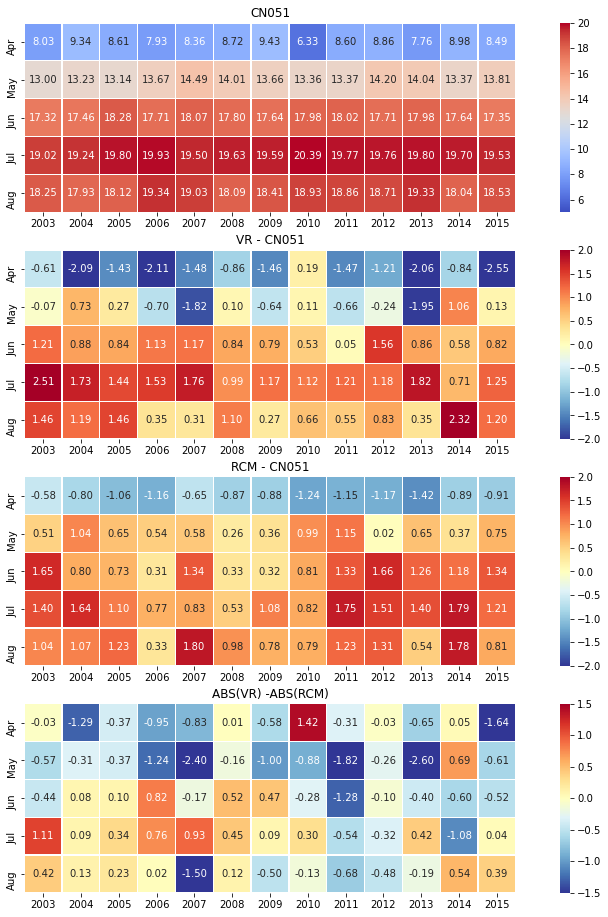

In [9]:
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.colors as mcolors
# plt.figure(figsize=(14,4))
fig,ax = plt.subplots(4,1,figsize=(16,16))
fig.patch.set_facecolor('white')
# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# years_fmt = mdates.DateFormatter('%y')

# 重新映射颜色，但其实影响不大
norm = mcolors.Normalize(vmin=1, vmax=4)

sns.heatmap(cn051_pd, ax = ax[0], vmin=5,vmax=20 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="coolwarm",
annot=True)
sns.heatmap(vr_pd - cn051_pd,ax = ax[1], vmin = -2, vmax = 2 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="RdYlBu_r", 
annot=True)
sns.heatmap(rcm_pd - cn051_pd,ax = ax[2], vmin = -2, vmax = 2 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="RdYlBu_r", 
annot=True)
sns.heatmap(compared,ax = ax[3], vmin = -1.5, vmax = 1.5 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="RdYlBu_r", 
annot=True)
# ax.xticks(rotation=0)
ax[0].set_title("CN051")
ax[1].set_title("VR - CN051")
ax[2].set_title("RCM - CN051")
ax[3].set_title("ABS(VR) -ABS(RCM)")

xticks = pd.date_range(datetime.datetime(2003,1,1), datetime.datetime(2015,1,1), freq='ys')
for i in ax:
    i.set_xticklabels([x.strftime('%Y') for x in xticks]); 
    # rotated every ticks
    for tick in i.get_xticklabels():
        tick.set_rotation(0)

# does not work
# ax[2].xaxis.set_major_locator(years)
# ax[2].xaxis.set_major_formatter(years_fmt)
# ax[0].xaxis.set_major_formatter(dates.DateFormatter('%YY'))


# fig.title("2003-2015")
plt.savefig("./output_pic/t2m_heatplot_months_stats.png", dpi = 600)